In [1]:
from astropy import units as u
from poliastro.bodies import Earth, Mars, Sun
from poliastro.twobody import Orbit
from astropy.time import Time

In [2]:
#Data R, V to Orbit
r=[-6045,-3490,2500] << u.km
v=[-3.457,6.618,2.533] << u.km/u.s

In [3]:
orb=Orbit.from_vectors(Earth, r, v)

In [4]:
orb

7283 x 10293 km x 153.2 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT)

In [5]:
orb.epoch

<Time object: scale='tt' format='jyear_str' value=J2000.000>

In [6]:
orb.epoch

<Time object: scale='tt' format='jyear_str' value=J2000.000>

In [7]:
orb.epoch.iso

'2000-01-01 12:00:00.000'

In [8]:
orb.get_frame()

<GCRS Frame (obstime=J2000.000, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s)>

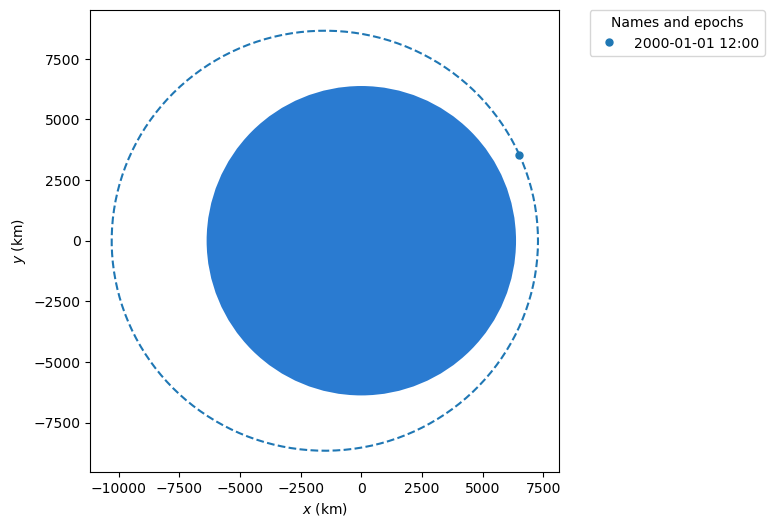

In [9]:
orb.plot()

In [ ]:
# Data for Mars at J2000 from JPL HORIZONS
a = 1.523679 << u.AU
ecc = 0.093315 << u.one
inc = 1.85 << u.deg
raan = 49.562 << u.deg
argp = 286.537 << u.deg
nu = 23.33 << u.deg

orb = Orbit.from_classical(Sun, a, ecc, inc, raan, argp, nu)

In [ ]:
orb.period.to(u.day)

In [ ]:
orb.r

In [ ]:
orb.v

In [ ]:
from poliastro.examples import iss
iss

In [ ]:
iss.epoch

In [ ]:
iss.nu.to(u.deg)

In [ ]:
iss.n.to(u.deg/u.min)

In [ ]:
iss_30m = iss.propagate(30<<u.min)

In [ ]:
iss_30m.nu.to(u.deg)

In [ ]:
iss.plot()
iss_30m.plot()

In [ ]:
from poliastro.twobody.sampling import EpochsArray, TrueAnomalyBounds, EpochBounds
from poliastro.util import time_range

In [ ]:
start_date = Time("2025-11-18 17:00", scale="utc")
end_date = Time("2025-11-18 23:59", scale="utc")


In [ ]:
ephem1 = iss.to_ephem()
ephem2 = iss.to_ephem(strategy=EpochsArray(epochs=time_range(start=start_date,end=end_date)))
ephem3 = iss.to_ephem(strategy=TrueAnomalyBounds(min_nu=0 << u.deg, max_nu=180 << u.deg))
ephem4 = iss.to_ephem(strategy=EpochBounds(min_epoch=start_date, max_epoch=end_date))

In [ ]:
ephem1.epochs[:3]

In [ ]:
ephem1.sample(ephem1.epochs[:3])

# 

In [ ]:
from poliastro.plotting import OrbitPlotter2D
from poliastro.maneuver import Maneuver

In [ ]:
op = OrbitPlotter2D()
orb_i = Orbit.circular(Earth, alt=300 << u.km)
hoh = Maneuver.hohmann(orb_i, 42164 << u.km)
orb_a, orb_f = orb_i.apply_maneuver(hoh, intermediate=True)
op.plot(orb_i, label="initial orbit")
op.plot(orb_a, label="Transfer orbit")
op.plot(orb_f, label="Final orbit")

In [ ]:
from poliastro.ephem import Ephem

In [ ]:
date_launch = Time('2011-11-26 15:02', scale='tdb')
date_arrival = Time('2012-08-06 05:17', scale='tdb')

orb0 = Orbit.from_ephem(Sun, Ephem.from_body(Earth, date_launch), date_launch)
orbf = Orbit.from_ephem(Sun, Ephem.from_body(Mars, date_arrival), date_arrival)

man_lambert = Maneuver.lambert(orb0, orbf)
dv_a, dv_b = man_lambert.impulses

In [ ]:
dv_a

In [ ]:
dv_b

In [ ]:
from czml3 import Document, Packet, Preamble

In [ ]:
print(Packet())

In [ ]:
packet0=Packet(id="Facility/AGI", name="AGI")

In [ ]:
print(packet0)

In [ ]:
from czml3.widget import CZMLWidget

In [ ]:
from czml3 import CZML_VERSION, Document, Packet
from czml3.properties import (
    Box,
    BoxDimensions,
    Color,
    Material,
    Position,
    SolidColorMaterial,
)
from czml3.types import Cartesian3Value
packet_box = Packet(
    id="my_id",
    position=Position(cartographicDegrees=[-114.0, 40.0, 300000.0]),
    box=Box(
        dimensions=BoxDimensions(
            cartesian=Cartesian3Value(values=[400000.0, 300000.0, 500000.0])
        ),
        material=Material(
            solidColor=SolidColorMaterial(color=Color(rgba=[0, 0, 255, 255]))
        ),
    ),
)
doc = Document(
    packets=[Packet(id="document", name="box", version=CZML_VERSION), packet_box]
)
print(doc)


In [ ]:
import numpy as np
from czml3.properties import Position
print(Position(cartographicDegrees=np.array([-114, 40, 300000], dtype=int)))